In [1]:
# Import some numerical math and plotting packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import the MesaProfile package
from MesaProfile import MesaProfile

# Import the OrderedDict package for working with MesaProfile outputs
from collections import OrderedDict

In [2]:
# Read the input MESA profile                                                                                                                                                                                      
mesa = MesaProfile('profile64.data')
mstar = mesa.getStar()

In [3]:
# List the data fields available in the profile
for k in mstar.keys():
    print(k)

zone
logT
logRho
logP
logR
luminosity
logL
velocity
entropy
conv_mixing_type
csound
v_div_csound
v_div_r
eta
mu
logdq
dq_ratio
q
radius
temperature
tau
logtau
pressure
pgas_div_ptotal
logPgas
grada
cp
logS
gam
free_e
chiRho
chiT
abar
zbar
z2bar
ye
log_opacity
eps_nuc
non_nuc_neu
eps_grav
mlt_mixing_length
log_D_mix
log_conv_vel
conv_vel_div_csound
log_mlt_D_mix
pressure_scale_height
gradT
gradr
dlnd_dt
dlnT_dt
mass
mmid
logxq
h1
he3
he4
c12
n14
o16
ne20
mg24
si28
pp
cno
tri_alfa
burn_c
burn_n
burn_o
burn_ne
burn_na
burn_mg
burn_si
burn_s
burn_ar
burn_ca
burn_ti
burn_cr
burn_fe
c12_c12
c12_o16
o16_o16
pnhe4
photo
other
extra_heat
gradr_sub_grada
brunt_N2
brunt_B
brunt_nonB
sign_brunt_N2
lamb_S2
lamb_S
log_brunt_nu
log_lamb_Sl2
log_lamb_Sl3
brunt_N_div_r_integral
k_r_integral
brunt_N2_sub_omega2
sl2_sub_omega2
logQ
radiuscm
model_number
num_zones
initial_mass
initial_z
star_age
time_step
Teff
photosphere_L
photosphere_r
center_eta
center_h1
center_he3
center_he4
center_c12
center_n14
cen

In [4]:
# Find out what isotopes the profile contains
isotope_list = mesa.getIsotopes()
nisotopes = len(isotope_list)
print('The MESA profile contains {} isotopes.'.format(nisotopes))

The MESA profile contains 9 isotopes.


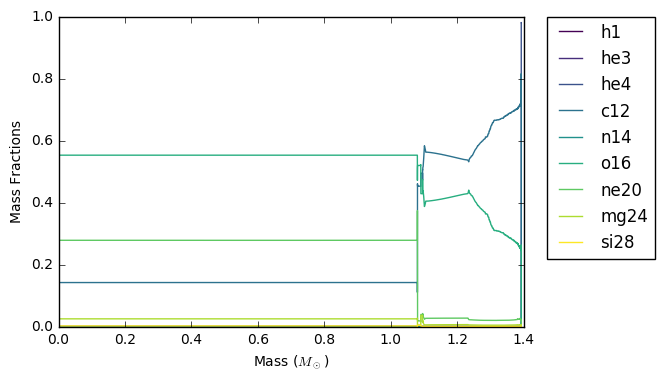

In [9]:
# Plot the abundances in the profile                                                                                                                                                                                                     
fig, ax = plt.subplots()
colormap = plt.get_cmap('viridis')
isocolors = [colormap(i) for i in np.linspace(0, 1, nisotopes)]

legend_handles = []
for i, isotope in enumerate(isotope_list):
    handle = ax.plot(mstar['mass'], mstar[isotope], color=isocolors[i], label=isotope)
    legend_handles.append(handle)
    
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Mass ($M_\\odot$)')
ax.set_ylabel('Mass Fractions')
plt.savefig('profile64.massfrac.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=300)

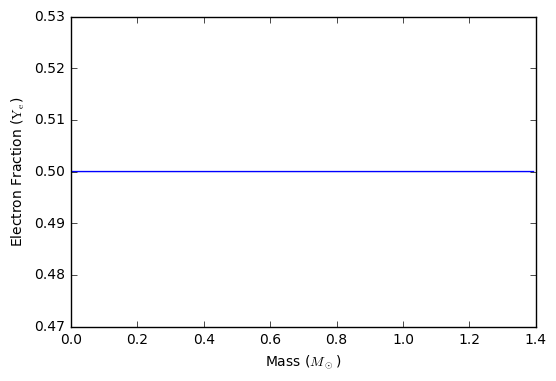

In [7]:
# Plot the electron fraction (Ye) profile
fig, ax = plt.subplots()
ax.plot(mstar['mass'],mstar['ye'],'b')
ax.set_xlabel('Mass ($M_\\odot$)')
ax.set_ylabel('Electron Fraction ($\\mathrm{Y_e}$)')
plt.savefig('profile64.ye.png', dpi=300)

In [ ]:
# Plot the density profile
fig, ax = plt.subplots()
ax.plot(mstar['mass'],10.0**mstar['logRho'],'b')
ax.set_xlabel('Mass ($M_\\odot$)')
ax.set_ylabel('Density ($g/cm^3$)')

In [ ]:
# Plot the temperature profile
fig, ax = plt.subplots()
ax.plot(mstar['mass'],10.0**mstar['logT'],'b')
ax.set_xlabel('Mass ($M_\\odot$)')
ax.set_ylabel('Temperature ($K$)')

In [ ]:
# Plot the mass-radius profile
fig, ax = plt.subplots()
ax.plot(mstar['radiuscm'],mstar['mass'],'b')
ax.set_xlabel('Radius (cm)')
ax.set_ylabel('Mass ($M_\\odot$)')